# Create plots for ablation study

In [45]:
# Install packages (only required if not already installed)
# !pip install matplotlib
# !pip install brokenaxes

In [3]:
# Load packages
from matplotlib import pyplot as plt
from brokenaxes import brokenaxes

# Define font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})

In [4]:
# Define plotting function
def make_plot(sizes, macro_f1s, weighted_f1s, accuracy, dataset_title, dataset_id, print_sizes = False):

    marker_style_1 = dict(linestyle='-.', color='#2e8b57', markersize=10, markerfacecolor="#2e8b57", markeredgecolor="#2e8b57")
    marker_style_2 = dict(linestyle='--', color='#fb9902', markersize=10, markerfacecolor="#fb9902", markeredgecolor="#fb9902")
    marker_style_3 = dict(linestyle=':', color='#9902FB', markersize=10, markerfacecolor="#9902FB", markeredgecolor="#9902FB")

    marker_style_4 = dict(linestyle=':', color='black', markersize=10, markerfacecolor="black", markeredgecolor="black")

    if print_sizes == True: 
        print((0, sizes[-2]))
        print((sizes[-1], sizes[-1]+10))
        print(sizes[1:])

    fig = plt.figure(figsize=(6.5, 4.5))

    bax = brokenaxes(xlims=((-50, sizes[-2]+50), (sizes[-1]-100, sizes[-1]+50)))
    ft_1 = bax.plot(sizes[1:], macro_f1s[1:], marker='*', **marker_style_1)
    bax.set_ylim(ymin=0.0, ymax=1.0)

    xticks_span = sizes
    bax.axs[0].set_xticks(xticks_span[:-1])
    bax.axs[0].set_xticklabels(xticks_span[:-1], rotation=90)
    bax.axs[1].set_xticks([ xticks_span[-1] ])
    bax.axs[1].set_xticklabels([ xticks_span[-1] ], rotation=90)

    ft_2 = bax.plot(sizes[1:], weighted_f1s[1:], marker='*', **marker_style_2)
    ft_3 = bax.plot(sizes[1:], accuracy[1:], marker='^', **marker_style_3)

    zs_1 = bax.plot(sizes[0], macro_f1s[0], marker='*', alpha=0.3, **marker_style_1)
    zs_2 = bax.plot(sizes[0], weighted_f1s[0], marker='*', alpha=0.3, **marker_style_2)
    zs_3 = bax.plot(sizes[0], accuracy[0], marker='^', alpha=0.3, **marker_style_3)

    bax.set_ylim(ymin=0.0, ymax=1.0)

    bax.set_title(dataset_title)
    bax.set_ylabel("Score")

    xticks_span = [ 0 ] + sizes[3:] if dataset_id in ["emo-anger", "brexit-stance"] else [ 0, 50 ] + sizes[2:]

    bax.axs[0].set_xticks(xticks_span[:-1])
    bax.axs[0].set_xticklabels(xticks_span[:-1], rotation=90)
    bax.axs[1].set_xticks([ xticks_span[-1] ])
    bax.axs[1].set_xticklabels([ xticks_span[-1] ], rotation=90)
    
    legend2 = plt.legend([l[0][0] for l in [ft_1, ft_2, ft_3]], ['F1 Macro', 'F1 Weighted', 'Accuracy'], ncol=1, prop={'size': 12}, title="ROB-LRG (FT)", loc="lower center")
    plt.legend([l[0][0] for l in [zs_1, zs_2, zs_3]], ['F1 Macro', 'F1 Weighted', 'Accuracy'], ncol=1, prop={'size': 12}, title="BART-LRG (ZS)", loc="lower right")
    plt.gca().add_artist(legend2)

    fig.savefig(f"ablation-{dataset_id}.jpg")

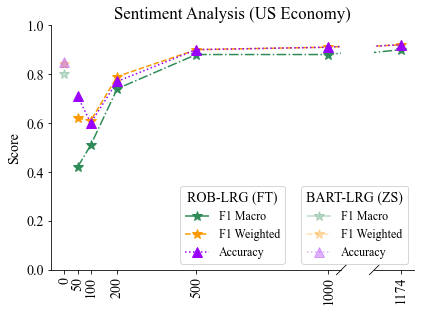

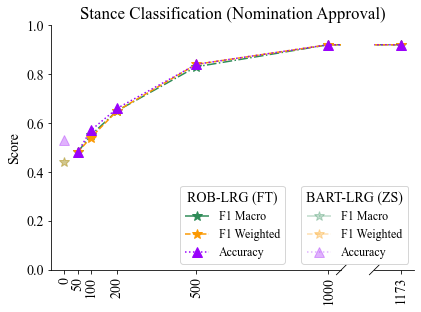

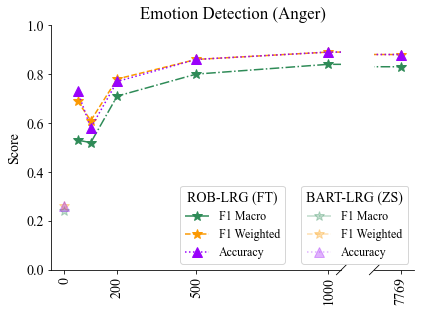

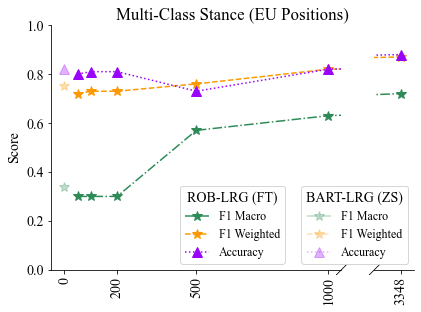

In [7]:
# Create and save plots:

# NYT
sizes =         [ 0,    50,     100,    200,    500,    1000,   1174 ]
macro_f1s =     [ 0.8,  0.42,   0.51,   0.74,   0.88,   0.88,   0.90 ]
weighted_f1s =  [ 0.84, 0.62,   0.61,   0.79,   0.90,   0.91,   0.92 ]
accuracy =      [ 0.85, 0.71,   0.60,   0.77,   0.90,   0.91,   0.92 ]

make_plot(sizes, macro_f1s, weighted_f1s, accuracy, "Sentiment Analysis (US Economy)", "nyt-sentiment")

# KVN
sizes =         [ 0,    50,     100,    200,    500,     1000,   1173 ]
macro_f1s =     [ 0.44, 0.48,   0.55,   0.65,   0.83,    0.92,   0.92 ]
weighted_f1s =  [ 0.44, 0.48,   0.54,   0.65,   0.84,    0.92,   0.92 ]
accuracy =      [ 0.53, 0.48,   0.57,   0.66,   0.84,    0.92,   0.92 ]

make_plot(sizes, macro_f1s, weighted_f1s, accuracy, "Stance Classification (Nomination Approval)", "kv-stance")

# Angry Emotion
sizes =         [ 0,    50,     100,    200,    500,    1000,   7769 ]
macro_f1s =     [ 0.24, 0.53,   0.52,   0.71,   0.80,   0.84,   0.83 ]
weighted_f1s =  [ 0.26, 0.69,   0.61,   0.78,   0.86,   0.89,   0.88 ]
accuracy =      [ 0.26, 0.73,   0.58,   0.77,   0.86,   0.89,   0.88 ]

make_plot(sizes, macro_f1s, weighted_f1s, accuracy, "Emotion Detection (Anger)", "emo-anger")

# Brexit Stance
sizes =         [ 0,    50,     100,    200,    500,    1000,   3348 ]
macro_f1s =     [ 0.34, 0.30,   0.30,   0.30,   0.57,   0.63,   0.72 ]
weighted_f1s =  [ 0.75, 0.72,   0.73,   0.73,   0.76,   0.82,   0.87 ]
accuracy =      [ 0.82, 0.80,   0.81,   0.81,   0.73,   0.82,   0.88 ]

make_plot(sizes, macro_f1s, weighted_f1s, accuracy, "Multi-Class Stance (EU Positions)", "brexit-stance")